# Final Exam Instructions

Instructions are provided as part of a reading along with this final exam. Please ensure that you have read them carefully before attempting this exam.

## Problem 1 (15 points)

In this problem, you are given a binary search tree whose keys are numbers. We would like to convert it to a list of all nodes with keys at depth 1 (root), depth 2 (children of root), and so on. At each depth, the keys must appear from left to right.

The example below will clarify the problem.

### Example

Consider the BST below as input:
<img src="attachment:tree1.png" width="25%"/>

You will need to output the list
~~~
[11, 4, 18, 15, 21, 13, 17]
~~~

Your algorithm should work in time that is linear in the number of nodes of the tree.

For your convenience, we have given you a binary search tree data structure `class TreeNode` with functions for insertion. Please complete the implementation of the `depthWiseTraverse` function.

**Hint** Try doing a breadth first search on a tree. You can use a python list as a "FIFO" (first in first out) queue to implement BFS.

In [1]:
class TreeNode:
    # Constructor for tree nodde
    def __init__(self, key, parent_node=None):
        self.key = key # set the key
        self.parent = parent_node # set the parent_node
        self.left = None # set the left child to None -- no left child to begin with
        self.right = None # set the right child to None - no right child to begin with.
    
    def is_root(self):
        return parent_node == None
    
    # Function: insert
    # insert a node with key `new_key` into the current tree.
    def insert(self, new_key):
        key = self.key 
        if new_key == key:
            print(f'Already inserted key {key}. Ignoring')
        elif new_key < key: # new_key must go into the left subtree
            if self.left == None: # no left child?
                new_node = TreeNode(new_key, self) # create one with self as parent
                self.left = new_node # set the left pointer
            else:
                self.left.insert(new_key) # recursively call insert on left subtree
        else:  # new_key must go into the right subtree.
            assert new_key > key
            if self.right == None: # no right child?
                new_node = TreeNode(new_key, self) # create one
                self.right = new_node
            else: 
                self.right.insert(new_key) # recusively call insert on right subtree.

# TODO: Implement the function depthWiseTraverse below



class Que():
    def __init__(self):
        self.stor =  []
        
    def add(self, el):
        self.stor.append(el)
        
    def pop(self):
        return self.stor.pop(0)
    
    
def depthWiseTraverse(root_node):
    # This function inputs the root node of the tree.
    # root_node is an instance of the TreeNode class provided to you above
    # See description and example above.
    # your code here
    
    q = Que()
    q.add(root_node)
    
    output = []
    while q.stor:
        current = q.pop()
        output.append(current.key)
        
        if current.left is not None:
            q.add(current.left)
        
        if current.right is not None:
            q.add(current.right)
            
            
    return output
            
            
    

In [2]:
def make_tree(insertion_list):
    assert len(insertion_list) > 0
    root_node = TreeNode(insertion_list[0])
    for elt in insertion_list[1:]:
        root_node.insert(elt)
    return root_node

print('-- Test 1 --')
# Same as the example above
tree1 = make_tree([11, 18, 15,  13, 21, 17, 4])
lst1 = depthWiseTraverse(tree1)
print(lst1)
assert lst1 == [11, 4, 18, 15, 21, 13, 17]

print('-- Test 2 --')

tree2 = make_tree([3, 1, 2, 4, 6, 7])
lst2 = depthWiseTraverse(tree2)
print(lst2)
assert lst2 == [3, 1, 4, 2, 6, 7]

print('-- Test 3 --')
tree3 = make_tree([7, 3, 1, 2, 4, 6, 15, 8, 11, 10, 9])
lst3 = depthWiseTraverse(tree3)
print(lst3)
assert lst3 == [7, 3, 15, 1, 4, 8, 2, 6, 11, 10, 9]

print('All tests passed: 15 points')

-- Test 1 --
[11, 4, 18, 15, 21, 13, 17]
-- Test 2 --
[3, 1, 4, 2, 6, 7]
-- Test 3 --
[7, 3, 15, 1, 4, 8, 2, 6, 11, 10, 9]
All tests passed: 15 points


## Problem 2 (15 points)

Once again consider a binary search tree (BST) whose keys are numbers. Given such a BST, you are asked to compute the sum along each branch from root to a leaf node starting with the leftmost branch and moving on to the rightmost.
  - For the purposes of this problem a leaf node is defined as having neither a left child nor a right child.

The example below will clarify the problem.

### Example

Consider the BST below as input:
<img src="attachment:tree2.png" width="45%">

You will need to output the list
~~~
[16, 22, 57, 61, 50]
~~~

Note: 
  - 16 = 11 + 4 -1 + 2
  - 22 = 11 + 4 + 7
  - 57 = 11 + 18 + 15 + 13
  - 61 = 11 + 18 + 15 + 17
  - 50 = 11 + 18 + 21

Your algorithm should work in time that is linear in the number of nodes of the tree.

For your convenience, we will reuse the binary search tree data structure `class TreeNode` with functions for insertion from the previous problem. Please ensure that you have run the cell corresponding to that problem.

Please complete the implementation of the `sumOfBranches` function.




In [3]:




class DFS():
    def __init__(self):
        self.seen = set()
        self.parents = {}
        self.leaves = []
        
        
    def dfs_visit(self, node):
        if node in self.seen:
            return
    
        self.seen.add(node)
        
        if node.left is None and node.right is None:
            
            self.leaves.append(node)
            return
        
        
        for neigh in node.left,node.right :
            if neigh is None:
                continue
            
            self.parents[neigh] = node
            self.dfs_visit(neigh)
            self.seen.add(neigh)
            
            
            
def get_sum(node, parents, s):
    
    if node not in parents:
        return s + node.key
    
    if parents[node] not in parents:
        return s + node.key + parents[node].key
    
    return get_sum(parents[node], parents, s + node.key)
    
    
            



def sumOfBranches(root_node):
    # return a list of sums 
    # your code here
    dfs = DFS()
    dfs.dfs_visit(root_node)
    
    leaves = dfs.leaves
    parents = dfs.parents
   
            
    sums = []
    
    for leave in leaves:
        
        
        sums.append(get_sum(leave, parents, 0))
        print(leave.key, get_sum(leave,parents,0))
            
            
    return sums
        
            
    
    
    



In [4]:
def make_tree(insertion_list):
    assert len(insertion_list) > 0
    root_node = TreeNode(insertion_list[0])
    for elt in insertion_list[1:]:
        root_node.insert(elt)
    return root_node

print('-- Test 1 --')
# Same as the example from problem 1
tree1 = make_tree([11, 18, 15,  13, 21, 17, 4])
lst1 = sumOfBranches(tree1)
print(lst1)

-- Test 1 --
4 15
13 57
17 61
21 50
[15, 57, 61, 50]


In [5]:
def make_tree(insertion_list):
    assert len(insertion_list) > 0
    root_node = TreeNode(insertion_list[0])
    for elt in insertion_list[1:]:
        root_node.insert(elt)
    return root_node

print('-- Test 1 --')
# Same as the example from problem 1
tree1 = make_tree([11, 18, 15,  13, 21, 17, 4])
lst1 = sumOfBranches(tree1)
print(lst1)
assert lst1 == [15, 57, 61, 50]

print('-- Test 2 --')
# Same as example from problem 2

tree2 = make_tree([11,4, 18, -1, 7, 15, 21, 2, 13, 17])
lst2 = sumOfBranches(tree2)
print(lst2)
assert lst2 == [16, 22, 57, 61, 50]

print('-- Test 3 --')
tree3 = make_tree([15])
lst3 = sumOfBranches(tree3)
print(lst3)
assert lst3 == [15]

print('-- Test 4 --')
tree4 = make_tree([4, 1, 2, 3, 8, 5, 6, 7,  10, 9])
lst4 = sumOfBranches(tree4)
print(lst4)
assert lst4 == [10, 30, 31]

print('All tests passed: 15 points!')

-- Test 1 --
4 15
13 57
17 61
21 50
[15, 57, 61, 50]
-- Test 2 --
2 16
7 22
13 57
17 61
21 50
[16, 22, 57, 61, 50]
-- Test 3 --
15 15
[15]
-- Test 4 --
3 10
7 30
9 31
[10, 30, 31]
All tests passed: 15 points!


## Problem 3 (15 points)

We have a rectangular grid of points where one corner is $(0,0)$ and the other corner is $(W,H)$, where $W,H$ represent the width and height of the grid, respectively. From each point $(x,y)$, we can move along one of the cardinal directions to $$(x', y') \in \left\{ (x+1, y), (x-1, y), (x, y+1), (x, y-1) \right\},$$ as long as $0 \leq x' \leq W$ and $0 \leq y' \leq H$ (i.e, we are not allowed to move out of the grid). 

Furthermore, we specify a set of $k$ circles $$C = \left\{(x_1, y_1, r_1), \ldots, (x_k, y_k, r_k ) \right\}$$
where each circle has center $(x_i, y_i)$ and radius $r_i$.

The goal is to find a path from $(0,0)$ to $(W,H)$ while avoiding any point on the surface of or inside the circles in $C$. If such a path is found, your algorithm should return the path as a list of grid points. If not, your algorithm should return the empty list.

### Example 1

Consider $W = H = 3$ and two circles $C= \{ (1,2,1), (2,2,0.5) \}$.
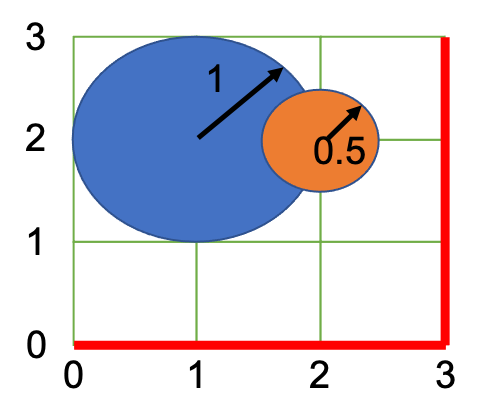

The red lines show a path from $(0,0)$ to $(3,3)$. Your algorithm may return a list
`[(0,0), (1,0), (2,0), (3, 0), (3,1), (3,2), (3,3) ]` (there is another path in this case and any of them may be returned.




#### Example 2
Consider $W = H = 3$ and two circles $C= \{ (1,2,1), (2,2,1) \}$.


There are no paths in this case (in particular (3,2) lies on the orange circle though this is not 100% clear from the picture). Your algorithm should return the empty list.


In [17]:
from math import sqrt



def generate_matrix(w, h):
    matrix =  []
    
    for i in range(h+1):
        line = []
        
        for j in range(w+1):
            line.append((i,j))
            
        matrix.append(line)
    
    
    return matrix


def make_graph(matrix, circle_list):
    
    adj_list = {}
    
    m = len(matrix)
    n = len(matrix[0])
    
    for i in range(m):
        for j in range(n):
            vertex = "({}, {})".format(i,j)
            
            
            if i < m-1 and not (ptInCircle(j, i+1, circle_list)):
                up_neigh = matrix[i+1][j]
            else:
                up_neigh = None
                
            if j < n-1 and not (ptInCircle(j+1, i, circle_list)):
                right_neigh = matrix[i][j+1]
            else:
                right_neigh = None
                
            adj_list[vertex] = { None if up_neigh is None else str(up_neigh)
                                , None if right_neigh is None else str(right_neigh)}
            
            
    #delete useless points
    
    for point in adj_list:
        if len(adj_list[point]) == 1 and None in adj_list[point]:
            adj_list[point] = None
            if point == "({}, {})".format(m-1, n-1):
                adj_list[point] = "FINISH"
    
    
    
    
    
    return adj_list
    
    

def bfs(graph, source):
    parents = {}
    distances = {}
    
    parents[source] = None
    distances[source] = 0
    
    que = Que()
    que.add(source)
    
    
    while que.stor:
        vertex = que.pop()
        if graph[vertex] == "FINISH":
            continue
        
        if graph[vertex] is None:
            continue
            
        for n in graph[vertex]:
            if n is None:
                continue
                
            parents[n] = vertex
            distances[n] = distances[vertex] + 1
            que.add(n)
            
            
    return parents
        

    
    

def make_tuple(s):
    
    first_el = s[1]
    sec_el = s[4]
    
    return (int(first_el), int(sec_el))[::-1]
    


def get_path(bfs_parents, finish):
    if finish not in bfs_parents:
        return []
    
    path = [finish]
    
    curr = bfs_parents[finish]
    
    while curr is not None:
        path.append(curr)
        curr = bfs_parents[curr]
        
    
    path = [make_tuple(s) for s in path]
        
        
    
    return path[::-1]






# You may use this function to test if a point lies inside given circle.
def ptInCircle(x,y, circles_list):
    for (xc,yc,rc) in circles_list:
        d = sqrt ( (x-xc)**2 + (y-yc)**2)
        if d <= rc:
            return True
    return False

def findPath(width, height, forbidden_circles_list):
    # width is a positive number
    # height is a positive number
    # forbidden_circles_list is a list of triples [(x1, y1, r1),..., (xk, yk, rk)]
    assert width >= 1
    assert height >= 1
    assert all(x <= width and x >=0 and y <= height and y >= 0 and r > 0 for (x,y,r) in forbidden_circles_list)
    # your code here
        
    matrix = generate_matrix(height, width)
    
    graph = make_graph(matrix, forbidden_circles_list)
    
    parents = bfs(graph, "(0, 0)")
    
    
    finish_coords = "({}, {})".format(width, height)
    
    path = get_path(parents, finish_coords)
    
    return path
    
    

In [18]:
circles = [(2,2,0.5), (1,2,1)]
p = findPath(3, 3, circles)
print(p)

[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3)]


In [19]:
def checkPath(width, height, circles, path):
    assert path[0] == (0,0), 'Path must begin at (0,0)'
    assert path[-1] == (width, height), f'Path must end at {(width, height)}'
    (cur_x, cur_y) = path[0]
    for (new_x, new_y) in path[1:]:
        dx = new_x - cur_x
        dy = new_y - cur_y
        assert (dx,dy) in [(1,0),(-1,0), (0,1),(0,-1)]
        assert 0 <= new_x and new_x <= width
        assert 0 <= new_y and new_y <= height
        assert not ptInCircle(new_x, new_y, circles)
        cur_x, cur_y = new_x, new_y
    return
print('-- Test 1 -- ')

circles = [(2,2,0.5), (1,2,1)]
p = findPath(3, 3, circles)
print(p)
checkPath(3, 3, circles, p)
print('-- Test 2 -- ')

circles1 = [(2,2,1), (1,2,1)]
p1 = findPath(3, 3, circles1)
print(p1)
assert p1 == [], 'Answer does not match with ours'

print('-- Test 3 -- ')
p2 = findPath(5,5, circles1)
print(p2)
checkPath(5, 5, circles1, p2)

print('-- Test 4 --')

circles3 = [(1,2,0.5), (2,2,1), (3,3,1),(4,3,1)]
p3 = findPath(5, 5, circles3)
print(p3)
checkPath(5, 5, circles3, p3)

print('-- Test 5 --')
circles5 = [ (4,1, 1), (4,4,1),(2,6,1)]
p5 = findPath(6,6,circles5)
print(p5)
assert p5 == []
print('All tests passed: 15 points!')

-- Test 1 -- 
[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (3, 3)]
-- Test 2 -- 
[]
-- Test 3 -- 
[(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5)]
-- Test 4 --
[(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (1, 5), (2, 5), (3, 5), (4, 5), (5, 5)]
-- Test 5 --
[]
All tests passed: 15 points!


### That's All Folks!